In [158]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.xception import preprocess_input

In [159]:
(x_train ,y_train) , (x_test ,  y_test) =  keras.datasets.cifar10.load_data()

In [160]:
x_train.shape

(50000, 32, 32, 3)

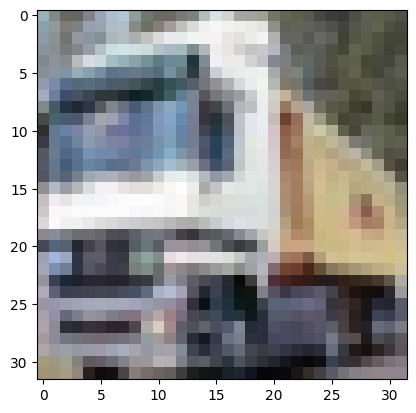

In [161]:
plt.imshow(x_train[1,:,:,:])


In [162]:
imges =  x_train[: , : , : ,:]
imges.shape


(50000, 32, 32, 3)

##difin esy model

In [163]:
xception = keras.applications.Xception()

In [164]:
xception.get_weights()[4]

array([1.174924  , 0.42562392, 0.7513589 , 0.3956494 , 1.3301405 ,
       1.8515638 , 1.2027425 , 0.48117185, 1.0230384 , 4.211655  ,
       1.436519  , 1.3428196 , 2.3895216 , 1.5807769 , 0.61565375,
       0.36527613, 0.34800532, 1.1410723 , 1.7575557 , 2.8983915 ,
       0.7578797 , 0.4013618 , 2.4910073 , 1.7205771 , 1.4753577 ,
       0.75064784, 0.2652215 , 0.24663983, 0.70143086, 1.3514191 ,
       2.9107018 , 4.0356674 ], dtype=float32)

# **Defining a section of code😃**

Well, since the Xception model is more complete, we’re using this model.

Now, what happens when we use the clone_model method is that the weights of our model get initialized randomly. So, instead, we take the weights from the previous model. Why? Because Xception is the most complete model and it has the best weights. So, the smartest thing to do is to use those weights.
"We built this model so that we have a copy of the original model. If any changes are made to the original model, we can still have a fixed and untouched model. Generally, I did this to make my work easier, and this step isn’t necessarily required."

In [165]:
model_0_clonwet =  keras.models.clone_model(xception)
model_0_clonwet.set_weights(xception.get_weights())

In [166]:
model_0_clonwet.get_weights()[4]

array([1.174924  , 0.42562392, 0.7513589 , 0.3956494 , 1.3301405 ,
       1.8515638 , 1.2027425 , 0.48117185, 1.0230384 , 4.211655  ,
       1.436519  , 1.3428196 , 2.3895216 , 1.5807769 , 0.61565375,
       0.36527613, 0.34800532, 1.1410723 , 1.7575557 , 2.8983915 ,
       0.7578797 , 0.4013618 , 2.4910073 , 1.7205771 , 1.4753577 ,
       0.75064784, 0.2652215 , 0.24663983, 0.70143086, 1.3514191 ,
       2.9107018 , 4.0356674 ], dtype=float32)

In [167]:
xception_base  =  keras.applications.Xception(include_top  = False)
ga_layer =  keras.layers.GlobalAveragePooling2D()(xception_base.output)
output =  keras.layers.Dense(1, activation  =  "sigmoid" , ) (ga_layer)
model  =  keras.Model(inputs = xception_base.input ,  outputs  = output)

In [168]:
for layer in xception_base.layers[:-5]:
    layer.trainable  = False

In [169]:
y_train_new = np.where(y_train == 3, 1, 0)[:5000]
# x_train =  x_train[:5000,] / 255.0

x_train_subset = x_train[:5000]
x_train_processed = preprocess_input(x_train_subset)
y_train = y_train_new[:, ]

In [170]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="binary_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [171]:
earlystopping_callback = keras.callbacks.EarlyStopping(patience=4,
                             restore_best_weights=True)

In [172]:
model.fit(x_train_processed , y_train_new , epochs= 10 , validation_split = 0.15,
          callbacks= [earlystopping_callback])

Epoch 1/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 78s 535ms/step - accuracy: 0.8139 - loss: 0.5973 - val_accuracy: 0.9013 - val_loss: 0.3508
Epoch 2/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 80s 524ms/step - accuracy: 0.8988 - loss: 0.3768 - val_accuracy: 0.9013 - val_loss: 0.3121
Epoch 3/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 82s 523ms/step - accuracy: 0.9081 - loss: 0.2733 - val_accuracy: 0.9027 - val_loss: 0.2869
Epoch 4/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 85s 546ms/step - accuracy: 0.9076 - loss: 0.2306 - val_accuracy: 0.9027 - val_loss: 0.2730
Epoch 5/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 82s 544ms/step - accuracy: 0.9188 - loss: 0.1939 - val_accuracy: 0.9000 - val_loss: 0.2661
Epoch 6/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 80s 531ms/step - accuracy: 0.9181 - loss: 0.1909 - val_accuracy: 0.9013 - val_loss: 0.2655
Epoch 7/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 71s 534ms/step - accuracy: 0.9262 - loss: 0.1670 - val_accuracy: 0.9000 - val_loss: 0.2562
Epoch 8/10
133/133 ━━━━━━━━━━━━━━━━━━━━ 82s 538ms/step - accuracy: 0.9422 - loss: 0

In [173]:
y_test_new = np.where(y_test == 3, 1, 0)[:]
print(y_test_new[0])

[1]


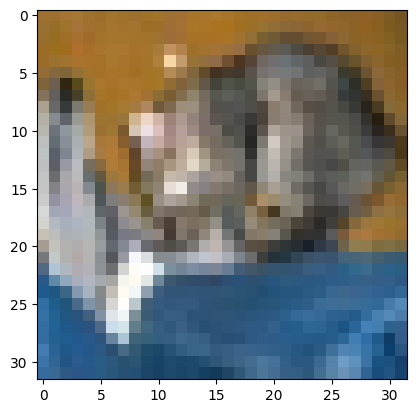

In [179]:
x  =0
plt.imshow(x_test[x])

In [180]:
x_testt =  x_test[:]
img = np.expand_dims(x_testt[0], axis=0)
processed_img = preprocess_input(img)
model.predict(processed_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.32348064]], dtype=float32)